In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_42641_G')

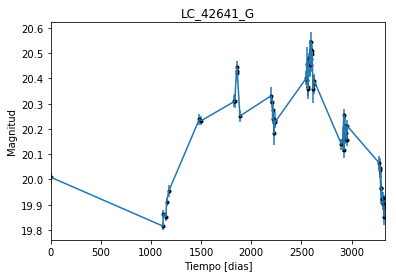

In [2]:
data = np.genfromtxt('LC_42641_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_42641_G')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

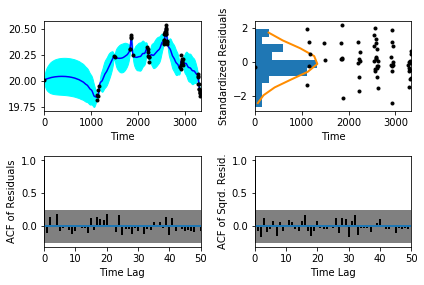

In [5]:
sample.assess_fit()

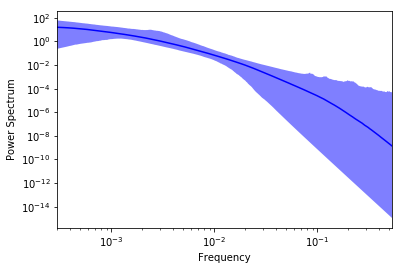

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_42641_G')

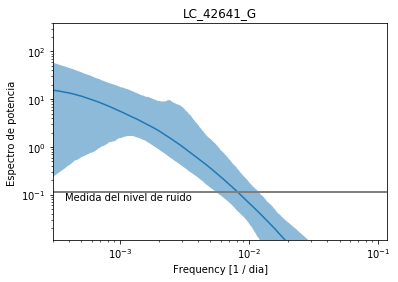

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_42641_G')

Text(0.5,1,'Prediccion , valor esperado LC_42641_G')

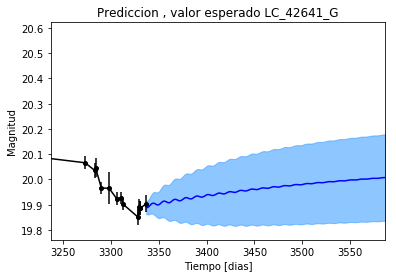

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_42641_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_42641_G')

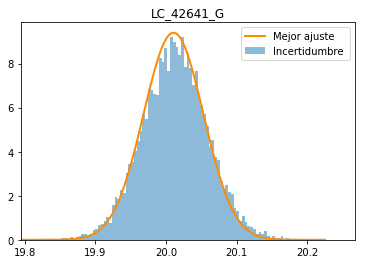

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_42641_G')

Text(0.5,1,'Interpolacion, camino simulado LC_42641_G')

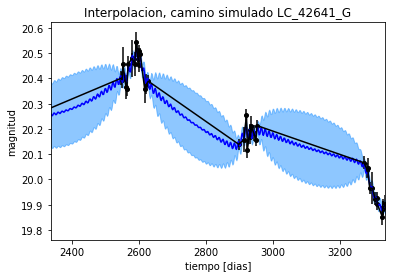

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_42641_G')

Text(0.5,1,'Interpolacion, camino simulado LC_42641_G')

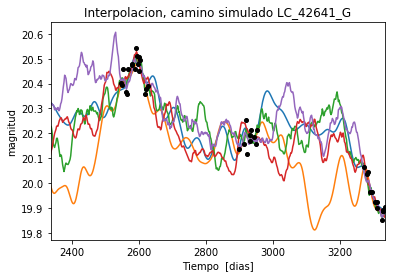

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_42641_G')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 441.196814477
Median: 0.0173178017925
Standard deviation: 0.208032659155
68% credibility interval: [ 0.00138223  0.22146635]
95% credibility interval: [  4.24795907e-04   8.06334727e-01]
99% credibility interval: [  3.23010407e-04   1.01193359e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 4724.01277098
Median: 0.00558017592063
Standard deviation: 0.0997467520638
68% credibility interval: [ 0.00077054  0.06393983]
95% credibility interval: [ 0.00035364  0.33743195]
99% credibility interval: [  3.08340305e-04   6.67340581e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 566.825806321
Median: 0.0418683823137
Standard 

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1097.1466843
Median: 116.717948812
Standard deviation: 1.69096215591
68% credibility interval: [ 114.82994969  117.92430116]
95% credibility interval: [ 112.22202468  118.84869695]
99% credibility interval: [ 110.14643504  119.70937168]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 323.605190488
Median: 0.948966368041
Standard deviation: 2.46304142124
68% credibility interval: [ 0.12859541  4.43713385]
95% credibility interval: [ 0.03141858  8.55129466]
99% credibility interval: [  0.01614907  11.61200792]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 398.601189421
Median: 1.60521030794
Standard deviation: 11.0007955334
68% credibility interval: [  0.07943798  14.83521723]
95% credibility interval: [  5.92094512

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1544.18170213
Median: 5.36378850128e-30
Standard deviation: 1.41285954345e+109
68% credibility interval: [  4.62483879e-61   9.11344764e-06]
95% credibility interval: [  1.06076206e-130   2.98104023e+083]
99% credibility interval: [  3.01270828e-135   6.74429677e+104]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2007.0508767
Median: 20.1332418801
Standard deviation: 0.0973258583996
68% credibility interval: [ 20.03510465  20.21034865]
95% credibility interval: [ 19.91448888  20.30257634]
99% credibility interval: [ 19.79910219  20.38661297]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 323.869252458
Median: 0.0849948108306
Standard deviation: 0.276648185212
68% credibility interval: [ 0.          0.50914953]
95% credibility interval: [ 0.          0.93773351]
99% credibility interval: [ 0.          1.03427693]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 323.869252458
Median: 0.0849948108306
Standard deviation: 0.276648185212
68% credibility interval: [ 0.          0.50914953]
95% credibility interval: [ 0.          0.93773351]
99% credibility interval: [ 0.          1.03427693]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 562.133326497
Median: 0.0
Standard deviation: 0.000720599725123
68% cr

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1097.1466843
Median: 116.717948812
Standard deviation: 1.69096215591
68% credibility interval: [ 114.82994969  117.92430116]
95% credibility interval: [ 112.22202468  118.84869695]
99% credibility interval: [ 110.14643504  119.70937168]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1077.09485949
Median: 0.0427679220692
Standard deviation: 0.029050591558
68% credibility interval: [ 0.02731691  0.07020565]
95% credibility interval: [ 0.01885806  0.11987721]
99% credibility interval: [ 0.01524729  0.18626397]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1333.89655327
Median: 1.06853432025
Standard deviation: 0.19142523672
68% credibility interval: [ 0.90653817  1.27392757]
95% credibility interval: [ 0.762264    1.51022803]
99% credibility interval: [ 0.69449806  1.70152697]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 505.31398844
Median: 0.0032003011601
Standard deviation: 0.252659335407
68% credibility interval: [  2.73836332e-05   6.74128633e-02]
95% credibility interval: [  3.29648550e-86   7.47463002e-01]
99% credibility interval: [  1.42474590e-108   1.63576206e+000]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 441.196814477
Median: (-0.108810957775-0.040424184928j)
Standard deviation: 2.17485183349
68% credibility interval: [-1.39151414+0.j         -0.00868478-0.10226818j]
95% credibility interval: [ -5.06635051e+00+0.j          -2.66907140e-03-0.05423707j]
99% credibility interval: [ -6.35816624e+00+0.j          -2.02953424e-03-2.11987915j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 4724.01277098
Median: (-0.035061279356+0j)
Standard deviation: 1.84776540088
68% credibility interval: [-0.40174581+1.09889758j -0.00484145+0.j        ]
95% credibility interval: [-2.12014747+5.12990458j -0.00222201+2.40496114j]
99% credibility interval: [ -4.19302453e+00+2.78020245j  -1.93735927e-03+0.j        ]
Posterior summary for param